### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
pd.set_option("display.max_columns", None)

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
data_df = pd.read_csv("Data.csv")
item_df = pd.read_csv("item.csv")
user_df = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

**3.1 Info**

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
item_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


In [7]:
user_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


**3.2 Shape**

In [10]:
print('data_df shape:', data_df.shape)
print('item_df shape:', item_df.shape)
print('user_df shape:', user_df.shape)

data_df shape: (100000, 4)
item_df shape: (1681, 22)
user_df shape: (943, 5)


**3.3 Describe**

In [15]:
print('data_df describe:')
print(data_df.describe())
print()
print('item_df describe:')
print(item_df.describe())
print()
print('user_df describe:')
print(user_df.describe())

data_df describe:
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08

item_df describe:
          movie id      unknown       Action    Adventure    Animation  \
count  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000   
mean    841.841761     0.000595     0.149316     0.080309     0.024985   
std     485.638077     0.024390     0.356506     0.271852     0.156126   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     422.00000

**3.4 Number of missing values**

In [14]:
print('data_df number of NaNs:')
print(data_df.isna().sum())
print()
print('item_df number of NaNs:')
print(item_df.isna().sum())
print()
print('user_df number of NaNs:')
print(user_df.isna().sum())

data_df number of NaNs:
user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

item_df number of NaNs:
movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

user_df number of NaNs:
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


#### 4. Find the number of movies per genre using the item data - 5 marks

In [21]:
# use sum on the default axis
item_df.iloc[:,4:].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [33]:
#hint: use sum on the axis = 1

# set `movie id` columns as index
item_df = item_df.set_index('movie id')

# separate columns with genres
genres_df = item_df.iloc[:,4:]

# collect movie ids with more than one genre
multiple_genres_movie_ids = set(genres_df[genres_df.sum(axis = 1) > 1].index)

print('There are', len(multiple_genres_movie_ids), 'movies with more than one genre')

There are 767 movies with more than one genre


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [34]:
# drop rows by index
print('item_df shape before:', item_df.shape)
item_df.drop(item_df[item_df.unknown == 1].index, inplace=True)
print('item_df shape after:', item_df.shape)

item_df shape before: (1681, 21)
item_df shape after: (1680, 21)


**Summary: one movie with unknown genre was removed**

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use bar plot for rating, countplot/distplot for age; release date and countplot for gender and occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below

#### 7.1 Rating bar plot

Text(0, 0.5, 'Number of ratings')

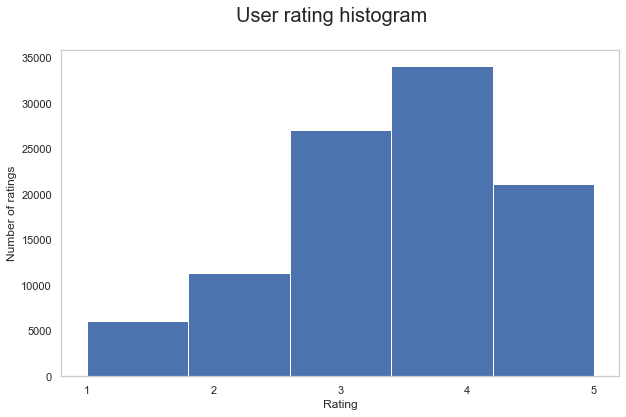

In [44]:
fig = plt.figure(figsize=(10,6))
data_df.rating.hist(bins=5, grid=False)
plt.xticks(range(1,6))
fig.suptitle("User rating histogram", fontsize=20)
plt.xlabel("Rating")
plt.ylabel("Number of ratings")

#### 7.2 Age distplot

Text(0.5, 0.98, 'Age histogram')

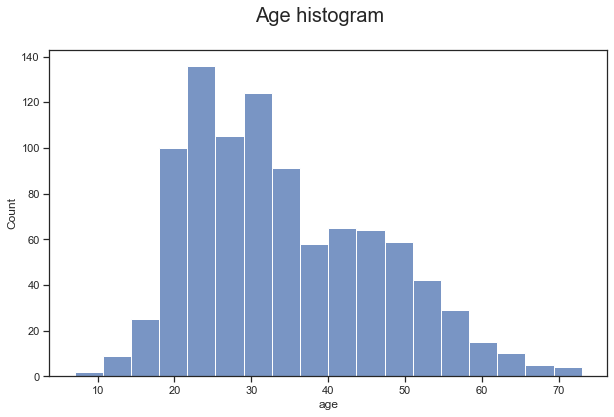

In [76]:
fig = plt.figure(figsize=(10,6))
sns.histplot(user_df.age)
fig.suptitle("Age histogram", fontsize=20)

#### 7.3 Release date distplot

Text(0, 0.5, 'Year')

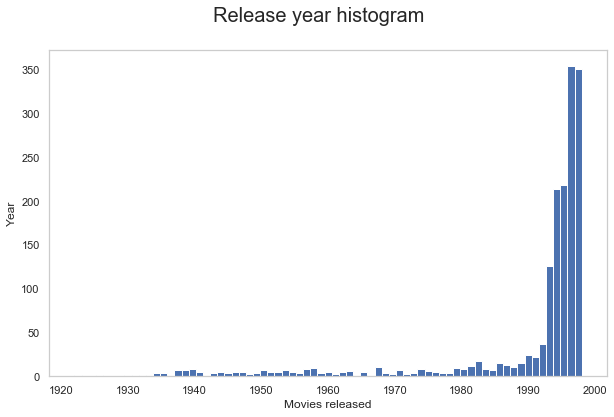

In [72]:
fig = plt.figure(figsize=(10,6))
release_years = pd.to_datetime(item_df['release date'], errors='coerce').dt.year.astype(int)
release_years.hist(bins=release_years.nunique(), grid=False)
fig.suptitle("Release year histogram", fontsize=20)
plt.xlabel("Movies released")
plt.ylabel("Year")

#### 7.4 Gender countplot

Text(0.5, 0.98, 'Gender histogram')

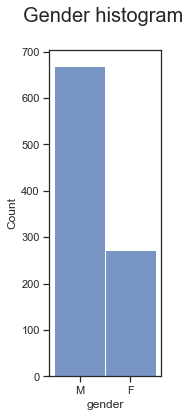

In [77]:
fig = plt.figure(figsize=(2,6))
sns.histplot(user_df.gender)
fig.suptitle("Gender histogram", fontsize=20)

#### 7.5 Occupation countplot

Text(0.5, 0.98, 'Occupation histogram')

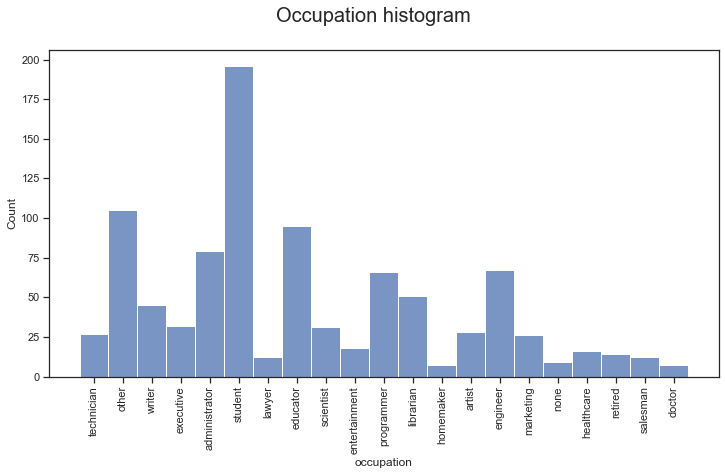

In [78]:
fig = plt.figure(figsize=(12,6))
ax = sns.histplot(user_df.occupation)
plt.xticks(rotation=90)
fig.suptitle("Occupation histogram", fontsize=20)

In [372]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [ ]:
#your answers here

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

#### 8.1 Popularity of genres over the years - all-in-one chart

Text(0.5, 0.98, 'Popularity of genres over the years')

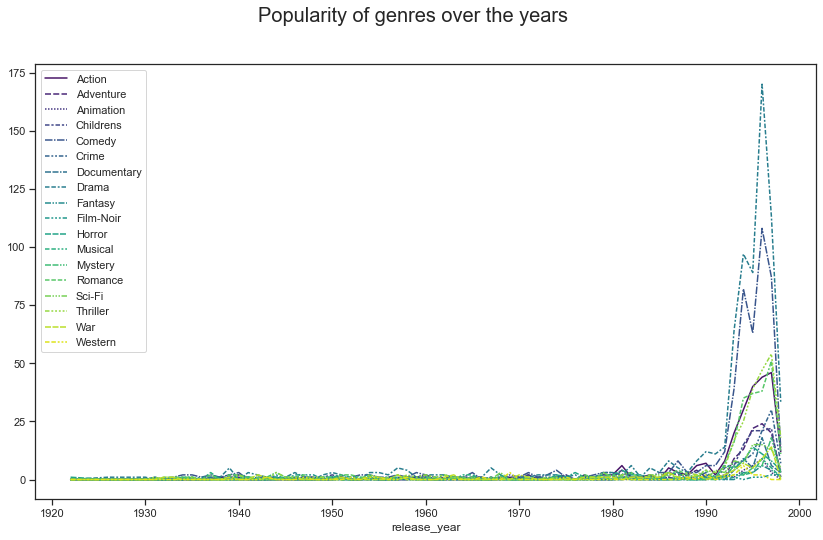

In [116]:
#Your answer here
genres_df = item_df.iloc[:,4:]
genres_df['release_year'] = pd.to_datetime(item_df['release date'], errors='coerce').dt.year.astype(int)
genres_df.sort_values(by='release_year', inplace=True)
fig = plt.figure(figsize=(14,8))
sns.lineplot(data=genres_df.groupby('release_year').sum(), palette='viridis')
fig.suptitle("Popularity of genres over the years", fontsize=20)

#### 8.2 Popularity of genres over the years - a chart for each genre

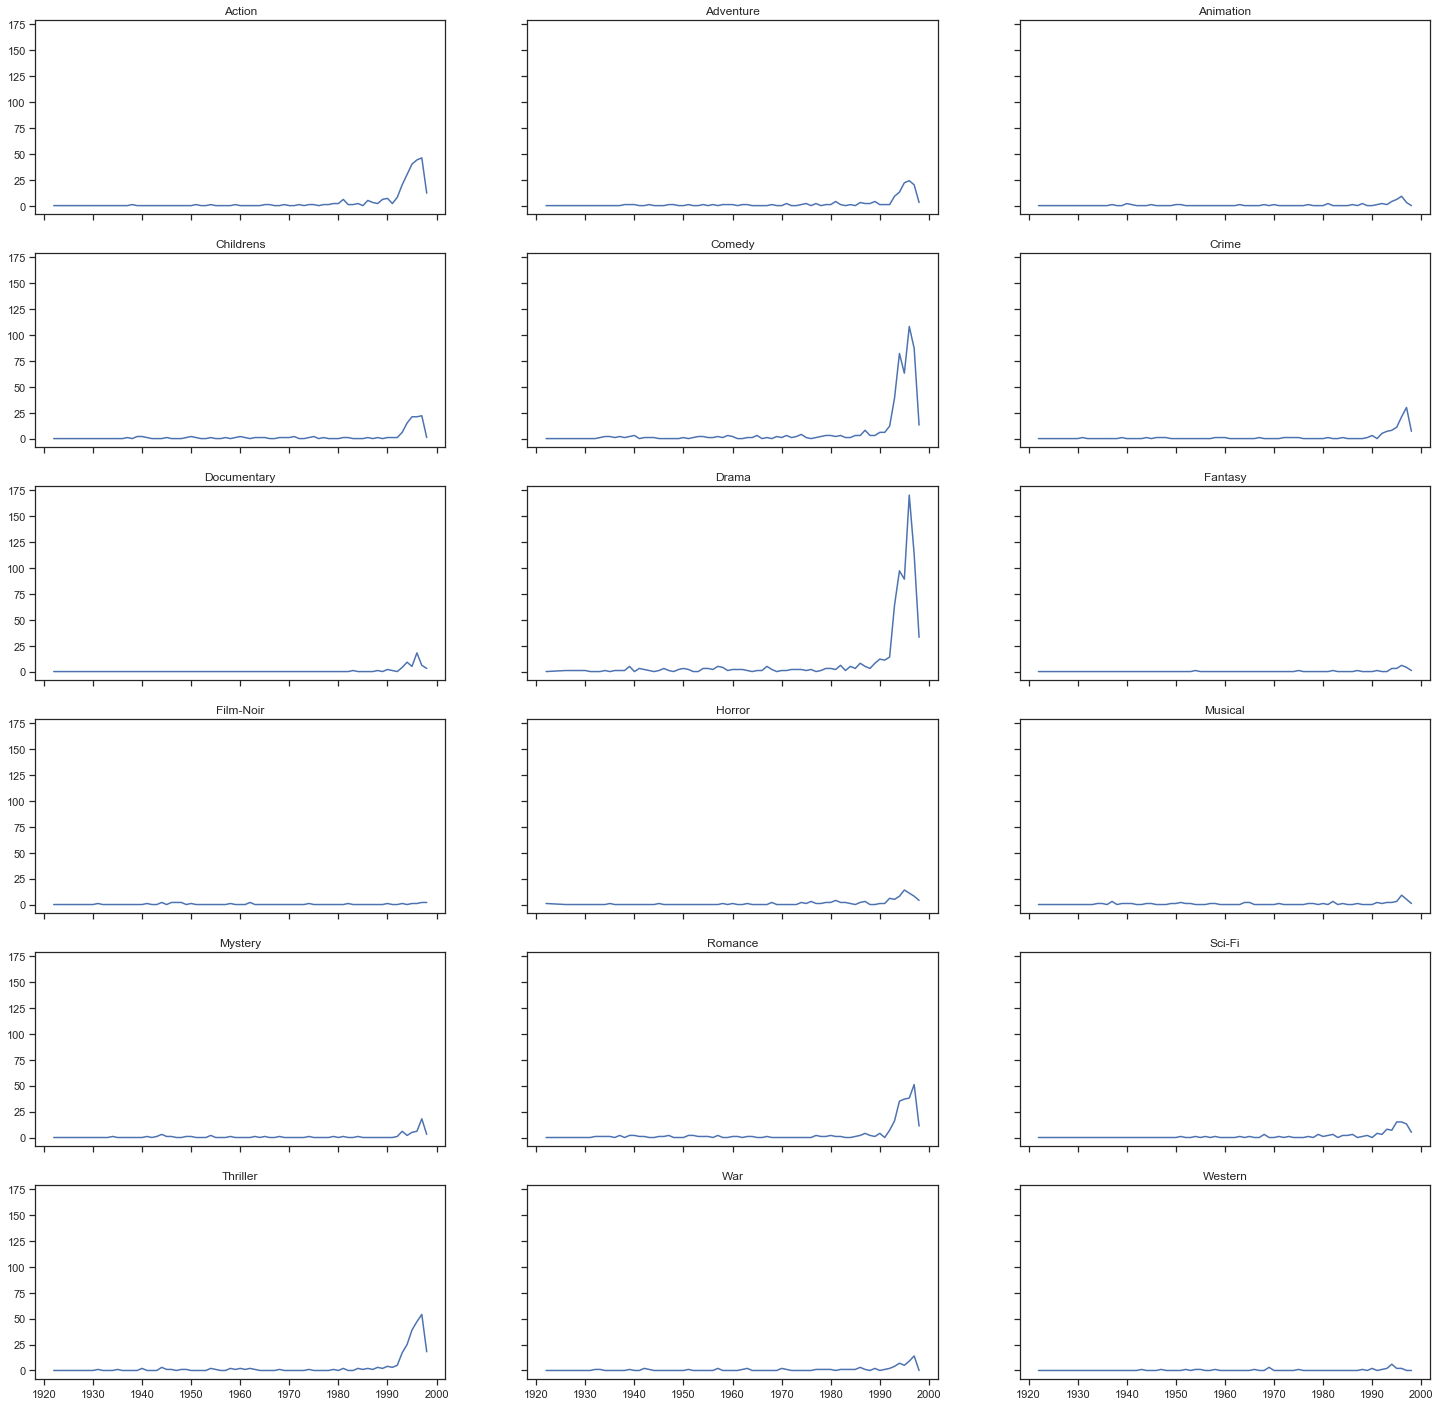

In [202]:
genres = list(genres_df.columns)
if 'release_year' in genres:
    genres.remove('release_year')
genre_groups = genres_df.groupby('release_year', as_index=False).sum()
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(25,25), sharex=True, sharey=True)
i = 0

for row in ax:
    for col in row:
        col.plot(genre_groups['release_year'], genre_groups[genres[i]])
        col.set_title(genres[i])
        i += 1

### 9. Find the top 25 movies, each having a minimum of 100 ratings - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [176]:
# 1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
ratings_count = data_df.groupby('movie id').rating.count().rename("rating_count")
min_100_df =  pd.DataFrame(ratings_count[ratings_count >= 100])
min_100_df = min_100_df.merge(item_df[['movie id', 'movie title']].set_index('movie id'),
                              how='left',
                              on='movie id')
min_100_ratings_movie_titles = list(min_100_df['movie title'])
print('There are {} movies that have more than 100 ratings. Here is the list:'.format(len(min_100_ratings_movie_titles)))
print(min_100_ratings_movie_titles)

There are 338 movies that have more than 100 ratings. Here is the list:
['Toy Story ', 'GoldenEye ', 'Get Shorty ', 'Twelve Monkeys ', 'Babe ', 'Dead Man Walking ', 'Seven (Se7en) ', 'Usual Suspects, The ', 'Mighty Aphrodite ', 'Postino, Il ', "Mr. Holland's Opus ", 'Braveheart ', 'Taxi Driver ', 'Rumble in the Bronx ', 'Birdcage, The ', 'Apollo 13 ', 'Batman Forever ', 'Crimson Tide ', 'Net, The ', 'Clerks ', 'Ed Wood ', 'Hoop Dreams ', 'Star Wars ', 'Natural Born Killers ', 'Outbreak ', 'Professional, The ', 'Pulp Fiction ', 'Quiz Show ', 'Stargate ', 'Shawshank Redemption, The ', "What's Eating Gilbert Grape ", 'While You Were Sleeping ', 'Ace Ventura: Pet Detective ', 'Crow, The ', 'Forrest Gump ', 'Four Weddings and a Funeral ', 'Lion King, The ', 'Mask, The ', 'Maverick ', 'Firm, The ', 'Fugitive, The ', 'Hudsucker Proxy, The ', 'Jurassic Park ', 'Much Ado About Nothing ', 'Remains of the Day, The ', 'Searching for Bobby Fischer ', 'Sleepless in Seattle ', 'Blade Runner ', 'Night

In [180]:
# 2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
avg_ratings = pd.DataFrame(data_df.groupby('movie id').rating.mean().sort_values(ascending=False).rename("rating_avg"))
avg_ratings = avg_ratings.merge(item_df[['movie id', 'movie title']].set_index('movie id'),
                                how='left',
                                on='movie id')
avg_ratings

,rating_avg,movie title
movie id,,
1293,5.000000,Star Kid
1467,5.000000,"Saint of Fort Washington, The"
1653,5.000000,Entertaining Angels: The Dorothy Day Story
814,5.000000,"Great Day in Harlem, A"
1122,5.000000,They Made Me a Criminal
1599,5.000000,Someone Else's America
1201,5.000000,Marlene Dietrich: Shadow and Light (
1189,5.000000,Prefontaine
1500,5.000000,Santa with Muscles


In [182]:
# 3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.
# NOTE: movie titles are not reliable as there are may exist different versions of the same film released in different years
# thus, it is recommended to merge on movie ids
top_movies = avg_ratings[avg_ratings.index.isin(min_100_df.index)]
top_movies

,rating_avg,movie title
movie id,,
408,4.491071,"Close Shave, A"
318,4.466443,Schindler's List
169,4.466102,"Wrong Trousers, The"
483,4.456790,Casablanca
64,4.445230,"Shawshank Redemption, The"
603,4.387560,Rear Window
12,4.385768,"Usual Suspects, The"
50,4.358491,Star Wars
178,4.344000,12 Angry Men


### Top 25 movies rated 100 and more times

In [183]:
top_movies[:25]

,rating_avg,movie title
movie id,,
408,4.491071,"Close Shave, A"
318,4.466443,Schindler's List
169,4.466102,"Wrong Trousers, The"
483,4.456790,Casablanca
64,4.445230,"Shawshank Redemption, The"
603,4.387560,Rear Window
12,4.385768,"Usual Suspects, The"
50,4.358491,Star Wars
178,4.344000,12 Angry Men


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

### 10.1 Men watch more drama than women - <font color='green'>TRUE</font>

In [197]:
drama_df = item_df[item_df.Drama==1][['movie id','movie title']].set_index('movie id')
drama_df = drama_df.merge(data_df[['movie id', 'user id']].set_index('movie id'),
                          how='left',
                          on='movie id')
drama_df = drama_df.merge(user_df[['gender', 'user id']],
                          how='left',
                          on='user id')
drama_df.gender.value_counts()

M    28887
F    11008
Name: gender, dtype: int64

#### Conclusion:

Drama genre movies got 11008 women views and 28887 men views, thus, watched by men more often

### 10.2 Women watch more Sci-Fi than men - <font color='red'>FALSE</font>

In [198]:
scifi_df = item_df[item_df['Sci-Fi'] == 1][['movie id','movie title']].set_index('movie id')
scifi_df = scifi_df.merge(data_df[['movie id', 'user id']].set_index('movie id'),
                          how='left',
                          on='movie id')
scifi_df = scifi_df.merge(user_df[['gender', 'user id']],
                          how='left',
                          on='user id')
scifi_df.gender.value_counts()

M    10101
F     2629
Name: gender, dtype: int64

#### Conclusion:

Sci-Fi genre movies got 2629 women views and 10101 men views, thus, watched by men more often

### 10.3 Men watch more Romance than women - <font color='green'>TRUE</font>

In [199]:
romance_df = item_df[item_df['Romance'] == 1][['movie id','movie title']].set_index('movie id')
romance_df = romance_df.merge(data_df[['movie id', 'user id']].set_index('movie id'),
                          how='left',
                          on='movie id')
romance_df = romance_df.merge(user_df[['gender', 'user id']],
                          how='left',
                          on='user id')
romance_df.gender.value_counts()

M    13603
F     5858
Name: gender, dtype: int64

#### Conclusion:

Romance movies got 5858 women views and 13603 men views, thus, watched by men more often